# Part 1 - Exploratory Data Analysis

In [59]:
#1. Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
#1. imprt data into separate frames
dfSurf = pd.read_csv("robots_surface.csv")
dfMove = pd.read_csv("robots_movement.csv")

In [9]:
dfSurf.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


In [6]:
#2. How many types of surfaces? Different Types? Distribution of different types?
dfSurf["surface"].value_counts()

# There are 9 types of surfaces.
# The different types of surfaces are all listed below.
# The distribution of the surfaces are listed from highest (concrete) to lowest (hard_tiles). 
# The data is not evenly distributed as the highest is 731 and lowest is 21.

concrete                  731
soft_pvc                  701
wood                      569
tiled                     482
fine_concrete             338
soft_tiles                297
hard_tiles_large_space    291
carpet                    180
hard_tiles                 21
Name: surface, dtype: int64

In [10]:
dfMove.head()

,series_id,measurement_number,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,direction_X,direction_Y,direction_Z
0,0,0,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,-2.198206,-0.024668,1.396664
1,0,1,0.067851,0.029939,0.003386,0.33995,1.5064,-9.4128,-2.198203,-0.024662,1.396646
2,0,2,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,-2.198178,-0.024728,1.396682
3,0,3,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,-2.198146,-0.024770,1.396721
4,0,4,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,-2.198135,-0.024784,1.396693


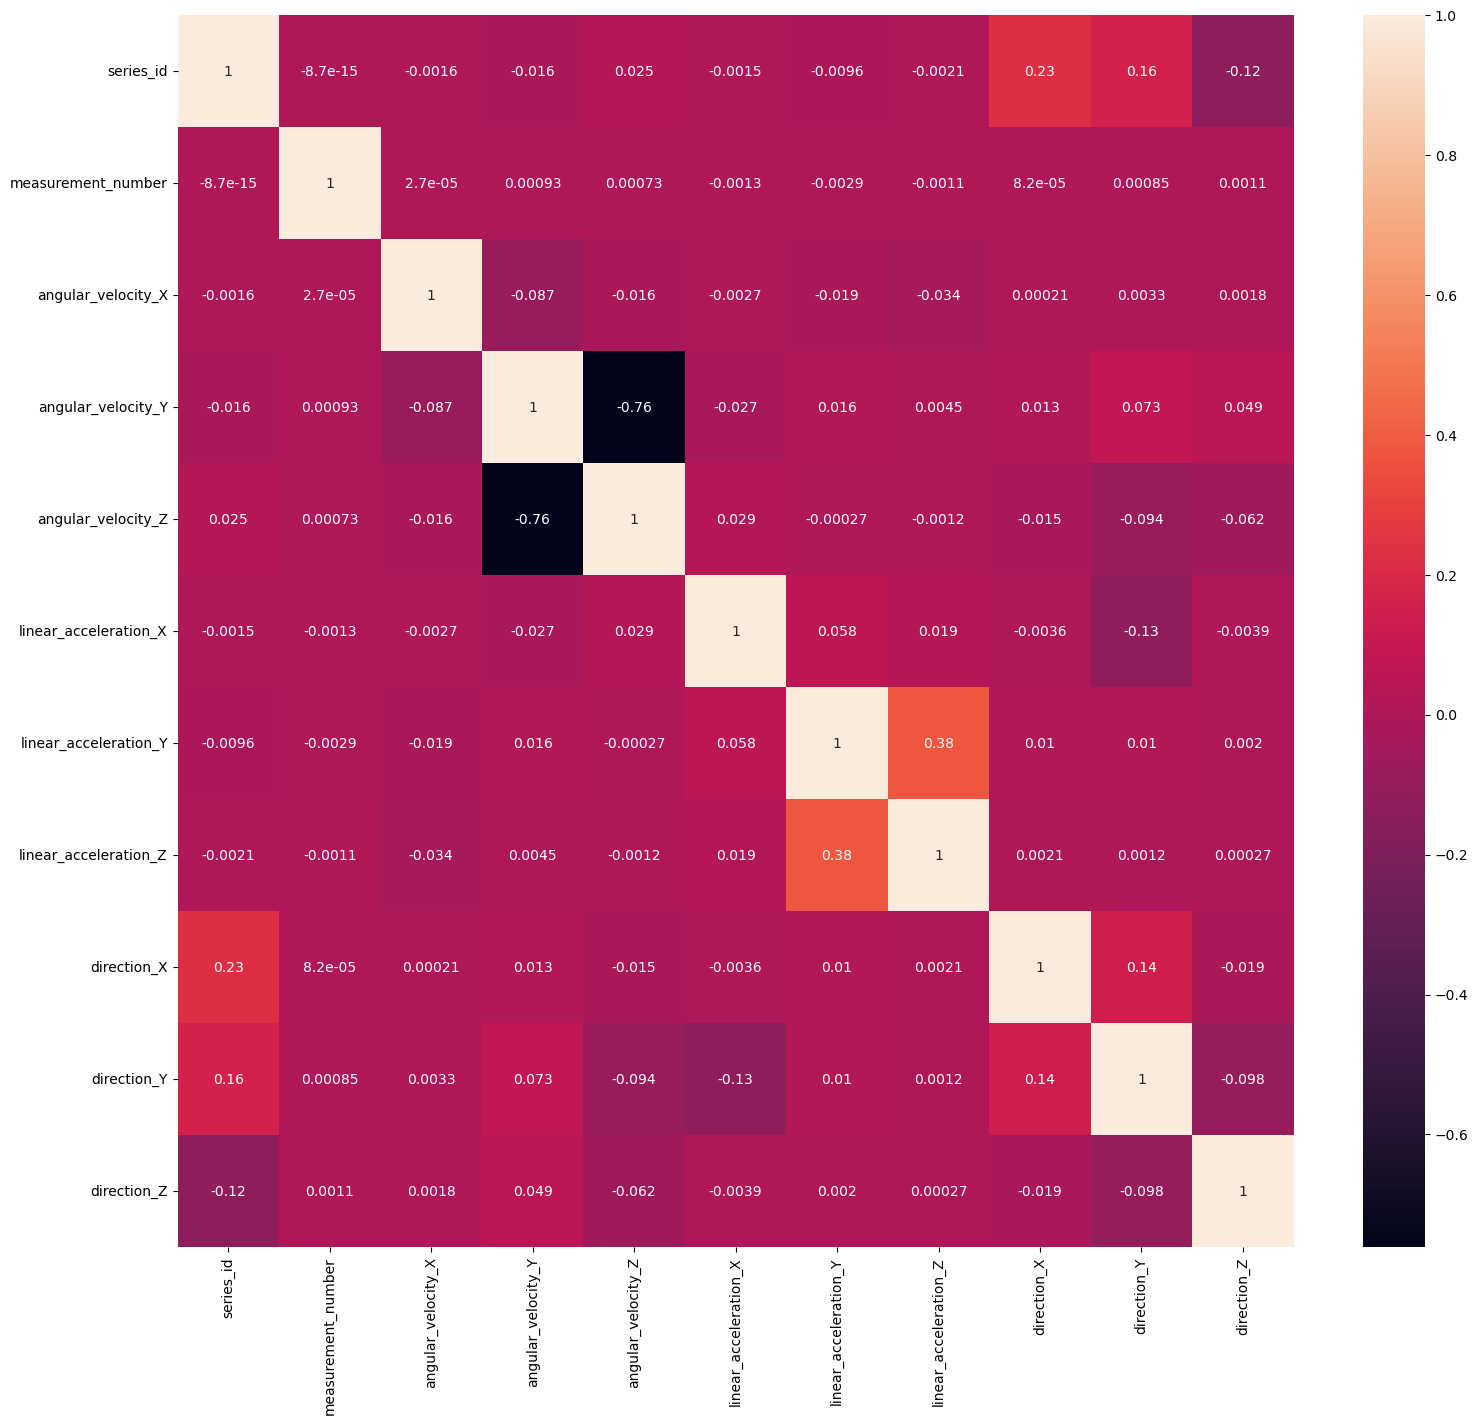

In [8]:
#3. Check correlqion of the input features (Movement)
fig = plt.figure(figsize = (18,16))
sns.heatmap(dfMove.corr(), annot = True)
plt.show()

# None of the input features have a high (positive and negative) correlation value with each other.

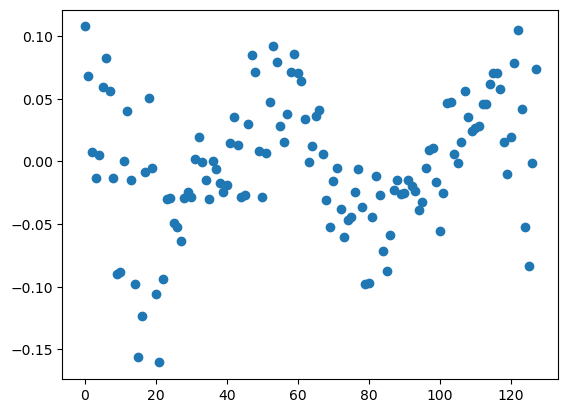

In [12]:
#4. Plot the features using the series id of 0 against time ("measurement number")
x = dfMove[dfMove["series_id"] == 0]["measurement_number"]
y = dfMove[dfMove["series_id"] == 0]["angular_velocity_X"]
plt.scatter(x,y)

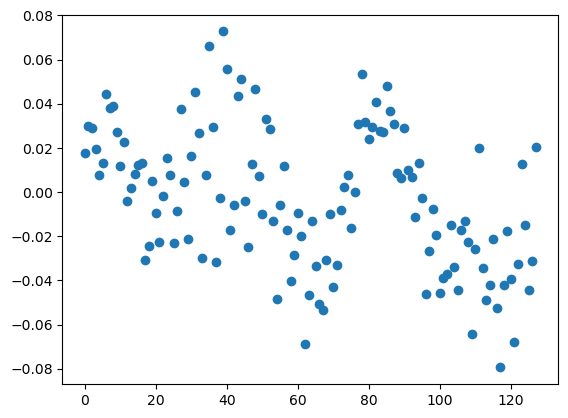

In [20]:
x = dfMove[dfMove["series_id"] == 0]["measurement_number"]
y = dfMove[dfMove["series_id"] == 0]["angular_velocity_Y"]
plt.scatter(x,y)

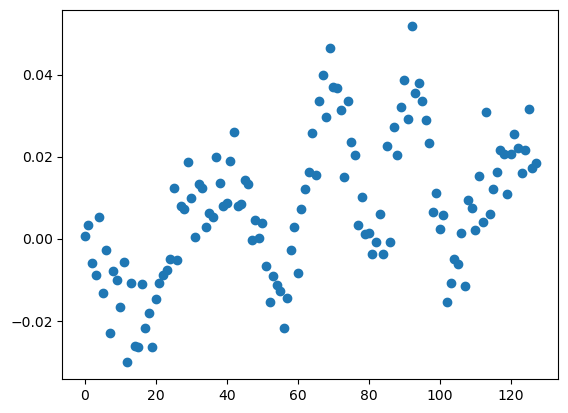

In [13]:
x = dfMove[dfMove["series_id"] == 0]["measurement_number"]
y = dfMove[dfMove["series_id"] == 0]["angular_velocity_Z"]
plt.scatter(x,y)

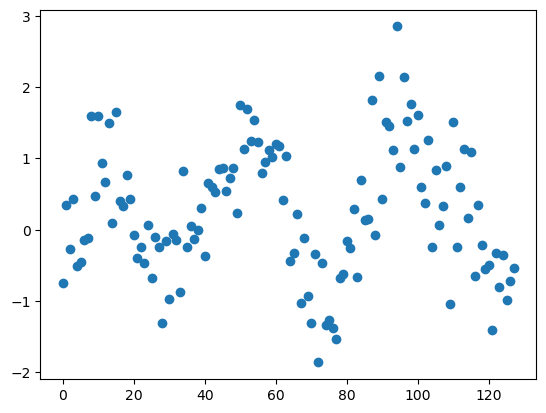

In [14]:
x = dfMove[dfMove["series_id"] == 0]["measurement_number"]
y = dfMove[dfMove["series_id"] == 0]["linear_acceleration_X"]
plt.scatter(x,y)

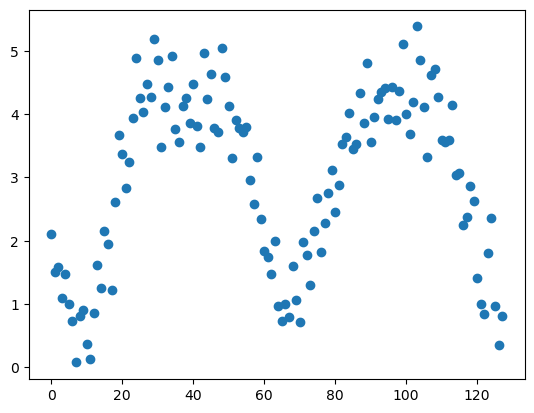

In [15]:
x = dfMove[dfMove["series_id"] == 0]["measurement_number"]
y = dfMove[dfMove["series_id"] == 0]["linear_acceleration_Y"]
plt.scatter(x,y)

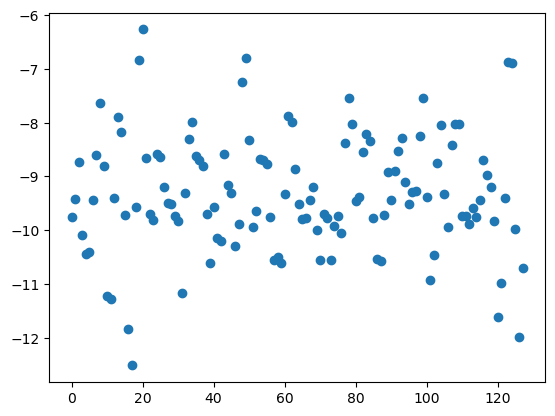

In [16]:
x = dfMove[dfMove["series_id"] == 0]["measurement_number"]
y = dfMove[dfMove["series_id"] == 0]["linear_acceleration_Z"]
plt.scatter(x,y)

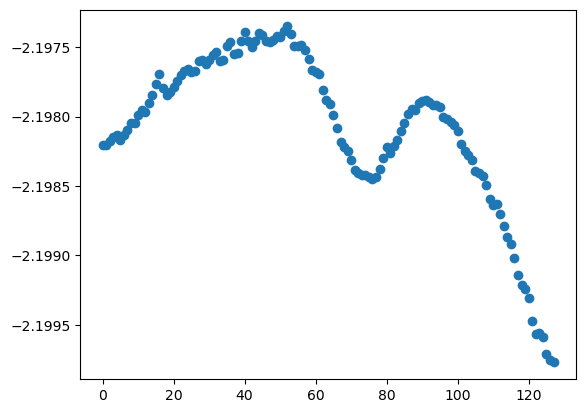

In [17]:
x = dfMove[dfMove["series_id"] == 0]["measurement_number"]
y = dfMove[dfMove["series_id"] == 0]["direction_X"]
plt.scatter(x,y)

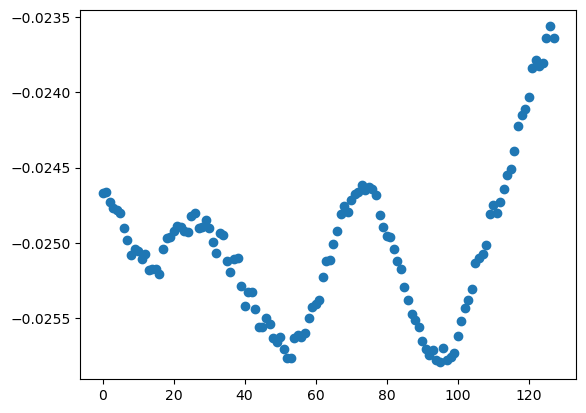

In [18]:
x = dfMove[dfMove["series_id"] == 0]["measurement_number"]
y = dfMove[dfMove["series_id"] == 0]["direction_Y"]
plt.scatter(x,y)

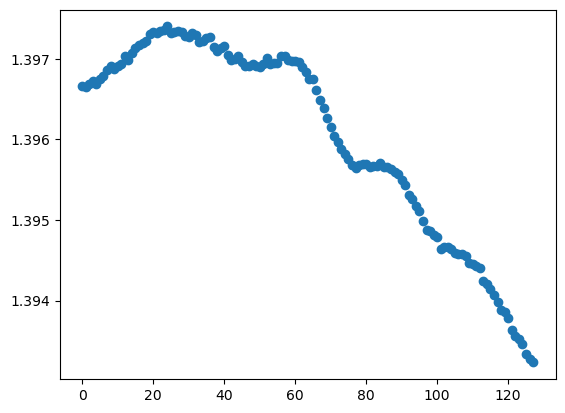

In [19]:
x = dfMove[dfMove["series_id"] == 0]["measurement_number"]
y = dfMove[dfMove["series_id"] == 0]["direction_Z"]
plt.scatter(x,y)

In [ ]:
# The plots across all three variables (x, y, and z) follow a distinct pattern that can be interpreted as a sinusoidal wave. 
# THere are some features that did not follow this pattern.
# The direction feature all had the data points in a less spread out fashion while the other two features were more spread out.

# Part 2 – Feature Engineering I and Baseline Models

In [22]:
#1. Groupby function on the mean
dfMove2 = dfMove.groupby("series_id").mean()
dfMove2.shape

(3610, 10)

In [23]:
#2. Assign to x and drop measurement number
x = dfMove2.drop(["measurement_number"], axis = 1)

In [28]:
#3. Label encode surfaces and assign to y
encoder = LabelEncoder()
dfSurf["surface"] = encoder.fit_transform(dfSurf["surface"])
y = dfSurf["surface"]

In [31]:
#4. Train a logistic model and set max_iter to 500
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lr=LogisticRegression(max_iter=500)
lr.fit(x_train_scaled, y_train)
print(lr.score(x_train_scaled,y_train))
y_predlr = lr.predict(x_test_scaled)
print(metrics.accuracy_score(y_test,y_predlr))
print(metrics.confusion_matrix(y_predlr, y_test))
print(metrics.classification_report(y_predlr,y_test))

# The logistic model did not have high prediction scores for any of the surfaces. 
# The condusion matrix shows that it made errors when recognizing the surface types.

0.32528690146418676
0.31671283471837486
[[  2   2   1   0   2   3   0   0   8]
 [ 24 120  47   0  35  55  52  59  53]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   1   3   0   0   1   0   1   0]
 [  0  42  17   5  36 120  42  43  28]
 [  0   3   3   0   0   3   2   0   0]
 [  0  13  13   0   1  14   0  16   8]
 [ 18  36  19   0  14  15   1  19  83]]
              precision    recall  f1-score   support

           0       0.05      0.11      0.06        18
           1       0.55      0.27      0.36       445
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.57      0.36      0.44       333
           6       0.02      0.18      0.04        11
           7       0.12      0.25      0.16        65
           8       0.46      0.40      0.43       205

    accuracy                           0.32      1083
   macro avg

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
#5. Train Kneighbors
knn = KNeighborsClassifier(n_neighbors = 2)
knn = knn.fit(x_train_scaled, y_train)
y_predknn = knn.predict(x_test_scaled)
cm = metrics.confusion_matrix(y_test,y_predknn)
print(cm)
print(metrics.accuracy_score(y_test, y_predknn))
resultsknn = metrics.classification_report(y_test,y_predknn)
print(resultsknn)

# The accuracy jumped up to 0.52 which is considerable better than the logistic model. 
# Confusion matrix also shows that the model improved in predicting surfaces.

[[ 25  10   3   0   1   2   1   2   0]
 [ 25 126  12   1  12  19   4  12   6]
 [ 12  19  59   0   1   9   1   0   2]
 [  0   1   0   2   1   0   0   0   1]
 [  3  24   2   0  41   9   7   1   1]
 [  8  22  16   0  12 138   4   6   5]
 [  0   8   4   2   7  11  63   2   0]
 [  3  42  12   0   3  25   9  41   3]
 [ 19  28  13   2   7  25   7   7  72]]
0.5235457063711911
              precision    recall  f1-score   support

           0       0.26      0.57      0.36        44
           1       0.45      0.58      0.51       217
           2       0.49      0.57      0.53       103
           3       0.29      0.40      0.33         5
           4       0.48      0.47      0.47        88
           5       0.58      0.65      0.61       211
           6       0.66      0.65      0.65        97
           7       0.58      0.30      0.39       138
           8       0.80      0.40      0.53       180

    accuracy                           0.52      1083
   macro avg       0.51      0.51

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [34]:
#6a. GridSearchCV
grid_params = {
    "n_neighbors":[1,2,3,4,5,6,7,8,9,10],
    "metric":["euclidean","manhattan"],
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    cv = 10
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_params_)

# The best distance metric is manhattan with the best parameter being 7.
# Cross validation is being used for overfitting purposes.
# The score increased to 0.6 which is a minor increase, but the predictive power should increase with these optimal parameters found by GridSearchCV.

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.6031228433402347
{'metric': 'manhattan', 'n_neighbors': 7}


C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [35]:
#6b. Retrain model using optimal parameters
knn = KNeighborsClassifier(n_neighbors = 7, metric = "manhattan")
knn = knn.fit(x_train_scaled, y_train)
y_predknn2 = knn.predict(x_test_scaled)
cm = metrics.confusion_matrix(y_test, y_predknn2)
print(cm)
print(metrics.accuracy_score(y_test, y_predknn2))
resultsknn2 = metrics.classification_report(y_test, y_predknn2)
print(resultsknn2)

# Accuracy increased to 0.62 which means the optimal parameters helped a bit in terms of prediction. 
# However, the other values are still fluctuating, so we may need to build another model.

[[ 18  11   3   0   2   3   1   3   3]
 [  4 141   7   0   5  26   7  10  17]
 [  2   9  63   0   2  17   1   2   7]
 [  0   0   0   2   1   0   1   0   1]
 [  1  17   1   0  42   6  14   3   4]
 [  3  14   6   0   2 164   8   6   8]
 [  0   5   3   0   5   7  72   3   2]
 [  2  30   8   0   3  14   6  69   6]
 [  8  30   5   0   2  23   4   6 102]]
0.6214219759926131
              precision    recall  f1-score   support

           0       0.47      0.41      0.44        44
           1       0.55      0.65      0.59       217
           2       0.66      0.61      0.63       103
           3       1.00      0.40      0.57         5
           4       0.66      0.48      0.55        88
           5       0.63      0.78      0.70       211
           6       0.63      0.74      0.68        97
           7       0.68      0.50      0.58       138
           8       0.68      0.57      0.62       180

    accuracy                           0.62      1083
   macro avg       0.66      0.57

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [39]:
#7a. Random forest
rf = RandomForestClassifier(n_estimators = 800)
rf.fit(x_train_scaled, y_train)
print(rf.score(x_train_scaled, y_train))
y_predrf = rf.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_predrf))

# So far this is the best working model as the accuracy is currently at 0.8.
# The training data score is at 1.0 meaning it predicted perfectly.

1.0
0.801477377654663


In [40]:
#7b. Confusion matrix
cm = metrics.confusion_matrix(y_test, y_predrf)
print(cm)
resultsrf = metrics.classification_report(y_test, y_predrf)
print(resultsrf)

# Surface 1 (Soft PVC) and surfaces 0 and 9 (both tied and concrete and hard tiles respectively) are the most misclassified. 
# Surface 0 has been misclassified as soft PVC, surface 1 has been misclassified as soft tile, surface 9 is misclassified the most as soft PVC. 

[[ 34   5   0   0   0   0   2   1   2]
 [  1 171   1   0   2  17   4   5  16]
 [  1   3  82   0   0   6   3   1   7]
 [  0   0   0   2   1   0   1   0   1]
 [  2  10   1   0  61   4   6   1   3]
 [  1   8   1   0   3 182   5   6   5]
 [  0   5   1   0   2   0  85   0   4]
 [  1   9   1   0   0   3   0 120   4]
 [  5  21   1   0   3  10   3   6 131]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.76        44
           1       0.74      0.79      0.76       217
           2       0.93      0.80      0.86       103
           3       1.00      0.40      0.57         5
           4       0.85      0.69      0.76        88
           5       0.82      0.86      0.84       211
           6       0.78      0.88      0.83        97
           7       0.86      0.87      0.86       138
           8       0.76      0.73      0.74       180

    accuracy                           0.80      1083
   macro avg       0.83      0.75      0.78      108

# Part 3 – Feature Engineering II and Improving the Models

In [41]:
# 1. New Data frame
new_df = pd.DataFrame()

for col in dfMove.columns:
    new_df[col + '_mean'] = dfMove.groupby(['series_id'])[col].mean()
    new_df[col + '_min'] = dfMove.groupby(['series_id'])[col].min()
    new_df[col + '_max'] = dfMove.groupby(['series_id'])[col].max()
    new_df[col + '_std'] = dfMove.groupby(['series_id'])[col].std()

In [42]:
#2. Measurements
new_df.shape

# 3610 observations across 44 features

(3610, 44)

In [43]:
#3a. The features that need to be removed are the mean, min, max, and std of measurement number and series id.

new_df.head()

,series_id_mean,series_id_min,series_id_max,series_id_std,measurement_number_mean,measurement_number_min,measurement_number_max,measurement_number_std,angular_velocity_X_mean,angular_velocity_X_min,...,direction_X_max,direction_X_std,direction_Y_mean,direction_Y_min,direction_Y_max,direction_Y_std,direction_Z_mean,direction_Z_min,direction_Z_max,direction_Z_std
series_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0,0,0.0,63.5,0,127,37.094474,-0.002481,-0.16041,...,-2.197350,0.000574,-0.025037,-0.025795,-0.023562,0.000503,1.396035,1.393233,1.397402,0.001221
1,1.0,1,1,0.0,63.5,0,127,37.094474,0.004605,-0.25480,...,2.429841,0.001387,-0.010369,-0.012073,-0.009109,0.000822,-0.492731,-0.494641,-0.490164,0.001131
2,2.0,2,2,0.0,63.5,0,127,37.094474,0.002646,-0.15271,...,-2.040610,0.000668,-0.012195,-0.012734,-0.011795,0.000173,2.055021,2.049684,2.061288,0.003219
3,3.0,3,3,0.0,63.5,0,127,37.094474,0.000624,-0.40152,...,2.356419,0.002101,-0.015107,-0.015698,-0.014645,0.000234,-0.635656,-0.638340,-0.634294,0.000931
4,4.0,4,4,0.0,63.5,0,127,37.094474,0.006969,-0.10407,...,2.245355,0.005080,-0.009793,-0.010192,-0.009358,0.000241,-0.894147,-0.915040,-0.867983,0.013836


In [44]:
#3b. Split and Scale data
x = new_df.drop(["measurement_number_mean", "measurement_number_max", "measurement_number_min", "measurement_number_std", "series_id_mean", "series_id_max", "series_id_min", "series_id_std"], axis = 1)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.3)
scaler = StandardScaler()
x_train_scaled2 = scaler.fit_transform(x_train2)
x_test_scaled2 = scaler.transform(x_test2)

In [48]:
#3c. Logistic Model
lr2=LogisticRegression(max_iter=500)
lr2.fit(x_train_scaled2, y_train2)
print(lr2.score(x_train_scaled2, y_train2))
y_predlr2 = lr2.predict(x_test_scaled2)
print(metrics.accuracy_score(y_test2,y_predlr2))
print(metrics.confusion_matrix(y_predlr2, y_test2))
print(metrics.classification_report(y_predlr2, y_test2))

0.5132568262762168
0.5161588180978762
[[ 12   7   3   0   1   4   4   1   4]
 [ 12 133  15   0  20  17   1  51  25]
 [  1   9  14   0   0   7   0   1   4]
 [  0   0   0   0   0   0   0   0   0]
 [  0   7   5   0  34   2   0  15   4]
 [  7  16  24   5  20 166  10  10  26]
 [ 10   6   5   1   1   7  65   3   5]
 [  3  27   6   0   7   0   0  53  10]
 [  6  10  38   0   5  22   3  11  82]]
              precision    recall  f1-score   support

           0       0.24      0.33      0.28        36
           1       0.62      0.49      0.54       274
           2       0.13      0.39      0.19        36
           3       0.00      0.00      0.00         0
           4       0.39      0.51      0.44        67
           5       0.74      0.58      0.65       284
           6       0.78      0.63      0.70       103
           7       0.37      0.50      0.42       106
           8       0.51      0.46      0.49       177

    accuracy                           0.52      1083
   macro avg  

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
#3d. KNeighbor and GridParam
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn2 = knn2.fit(x_train_scaled2, y_train2)
y_predknn2 = knn2.predict(x_test_scaled2)
cm = metrics.confusion_matrix(y_test2, y_predknn2)
print(cm)
print(metrics.accuracy_score(y_test2, y_predknn2))
resultsknn2 = metrics.classification_report(y_test2, y_predknn2)
print(resultsknn2)

[[ 28  12   3   0   2   2   1   1   2]
 [ 15 169   6   0   8   4   1   9   3]
 [  1  11  86   0   1   9   0   0   2]
 [  0   0   0   4   0   1   0   0   1]
 [  2  11   3   0  67   2   1   1   1]
 [  6  11  14   0   3 183   5   1   2]
 [  0   2   0   2   0   3  76   0   0]
 [  2  46   4   0   3   5   2  79   4]
 [  8  20  14   0   7   9   3  10  89]]
0.7211449676823638
              precision    recall  f1-score   support

           0       0.45      0.55      0.50        51
           1       0.60      0.79      0.68       215
           2       0.66      0.78      0.72       110
           3       0.67      0.67      0.67         6
           4       0.74      0.76      0.75        88
           5       0.84      0.81      0.83       225
           6       0.85      0.92      0.88        83
           7       0.78      0.54      0.64       145
           8       0.86      0.56      0.67       160

    accuracy                           0.72      1083
   macro avg       0.72      0.71

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [49]:
grid_params = {
    "n_neighbors":[1,2,3,4,5,6,7,8,9,10],
    "metric":["euclidean","manhattan"],
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    cv = 10
)

gs_results = gs.fit(x_train_scaled2, y_train2)

print(gs_results.best_score_)
print(gs_results.best_params_)

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.8242926155969634
{'metric': 'manhattan', 'n_neighbors': 1}


C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [52]:
knn2 = KNeighborsClassifier(n_neighbors = 1, metric = "manhattan")
knn2 = knn2.fit(x_train_scaled2, y_train2)
y_predknn2 = knn2.predict(x_test_scaled2)
cm = metrics.confusion_matrix(y_test2, y_predknn2)
print(cm)
print(metrics.accuracy_score(y_test2, y_predknn2))
resultsknn2 = metrics.classification_report(y_test2, y_predknn2)
print(resultsknn2)

[[ 26   9   3   0   1   3   1   1   7]
 [  1 172   4   0   6   8   1  12  11]
 [  0   7  88   0   2   7   0   1   5]
 [  0   0   0   5   0   0   0   0   1]
 [  2   8   3   0  72   0   0   1   2]
 [  0   9   4   0   1 197   3   1  10]
 [  0   1   0   1   0   1  80   0   0]
 [  0  21   1   0   0   3   1 110   9]
 [  3   7   7   0   3   3   0   7 130]]
0.8125577100646353
              precision    recall  f1-score   support

           0       0.81      0.51      0.63        51
           1       0.74      0.80      0.77       215
           2       0.80      0.80      0.80       110
           3       0.83      0.83      0.83         6
           4       0.85      0.82      0.83        88
           5       0.89      0.88      0.88       225
           6       0.93      0.96      0.95        83
           7       0.83      0.76      0.79       145
           8       0.74      0.81      0.78       160

    accuracy                           0.81      1083
   macro avg       0.82      0.80

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [58]:
#3e Random Forest training
rf = RandomForestClassifier(n_estimators = 800)
rf.fit(x_train_scaled2, y_train2)
print(rf.score(x_train_scaled2, y_train2))
y_predrf2 = rf.predict(x_test_scaled2)
print(metrics.accuracy_score(y_test2, y_predrf2))
cm = metrics.confusion_matrix(y_test2, y_predrf2)
print(cm)
resultsrf2 = metrics.classification_report(y_test2, y_predrf2)
print(resultsrf2)

1.0
0.8578024007386889
[[ 35   4   0   0   0   2   1   0   9]
 [  1 192   0   0   3   6   5   3   5]
 [  0  13  79   0   0   5   4   0   9]
 [  0   0   0   2   0   2   0   0   2]
 [  1   5   1   0  77   1   1   1   1]
 [  0  12   3   0   1 196   4   2   7]
 [  0   2   0   0   0   5  74   0   2]
 [  2   3   1   0   0   2   3 133   1]
 [  0   4   0   0   3   6   1   5 141]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        51
           1       0.82      0.89      0.85       215
           2       0.94      0.72      0.81       110
           3       1.00      0.33      0.50         6
           4       0.92      0.88      0.90        88
           5       0.87      0.87      0.87       225
           6       0.80      0.89      0.84        83
           7       0.92      0.92      0.92       145
           8       0.80      0.88      0.84       160

    accuracy                           0.86      1083
   macro avg       0.88      

In [ ]:
# Comparing this model with the new data frame with the old model, it showed an increase in accuracy from 0.8 to almost 0.9.
# As the new dataframe's features have become more standardized across the board using max, min, mean, and std; it helped because the observations are more simliar in value now.

# Part 4 – Testing Your Model

In [67]:
#4a. Best Model Predictor?
# model = GaussianNB() gave a 0.4 accuracy
# model = logistic regression = 0.5
# model  KNeighbors = 0.91 accuracy
sm = SMOTE()
x_bal, y_bal = sm.fit_resample(x, y)
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_bal, y_bal, test_size = 0.3)
scaler = StandardScaler()
x_train_scaled4 = scaler.fit_transform(x_train4)
x_test_scaled4 = scaler.transform(x_test4)

grid_params = {
    "n_neighbors":[1,2,3,4,5,6,7,8,9,10],
    "metric":["euclidean","manhattan"],
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    cv = 10
)

gs_results = gs.fit(x_train_scaled2, y_train2)

print(gs_results.best_score_)
print(gs_results.best_params_)

knn3= KNeighborsClassifier(n_neighbors = 1, metric = "manhattan")
knn3 = knn3.fit(x_train_scaled4, y_train4)
y_predknn4 = knn3.predict(x_test_scaled4)
cm = metrics.confusion_matrix(y_test4, y_predknn4)
print(cm)
print(metrics.accuracy_score(y_test4, y_predknn4))
resultsknn3 = metrics.classification_report(y_test4, y_predknn4)
print(resultsknn3)

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.8242926155969634
{'metric': 'manhattan', 'n_neighbors': 1}
[[209   1   2   0   0   0   0   0   1]
 [ 14 148  12   0   8  10   2  26   5]
 [  0   1 203   0   0   2   0   0   1]
 [  0   0   0 231   0   0   0   0   0]
 [  2   0   1   0 212   0   0   3   1]
 [  0   3   2   0   3 192   0   4   5]
 [  1   2   0   0   0   1 221   3   0]
 [  1  10   0   0   3   1   1 203  12]
 [  4   4   8   1   4   2   0   7 181]]
0.9118541033434651
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       213
           1       0.88      0.66      0.75       225
           2       0.89      0.98      0.93       207
           3       1.00      1.00      1.00       231
           4       0.92      0.97      0.94       219
           5       0.92      0.92      0.92       209
           6       0.99      0.97      0.98       228
           7       0.83      0.88      0.85       231
           8       0.88      0.86      0.87       211

    accuracy              

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Best model down below

In [70]:
sm = SMOTE()
x_bal, y_bal = sm.fit_resample(x, y)
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_bal, y_bal, test_size = 0.3)
scaler = StandardScaler()
x_train_scaled4 = scaler.fit_transform(x_train4)
x_test_scaled4 = scaler.transform(x_test4)

rf = RandomForestClassifier(n_estimators = 800)
rf.fit(x_train_scaled4, y_train4)
print(rf.score(x_train_scaled4, y_train4))
y_predrf4 = rf.predict(x_test_scaled4)
print(metrics.accuracy_score(y_test4, y_predrf4))
cm = metrics.confusion_matrix(y_test4, y_predrf4)
print(cm)
resultsrf4 = metrics.classification_report(y_test4, y_predrf4)
print(resultsrf4)

# accuracy about 0.94
# Random Forest is the best one so far with a balanced data set using the Smote Command
# The random forest classification was chosen as it had the highest accurate predictive power based on part 2 and 3.
# From a previous lab, we learned a balanced data set was supposed to increase the accuracy of our predictions which is why I decided to use the SMOTE function over PCA and other ones.

1.0
0.936676798378926
[[194   0   0   0   1   0   0   0   0]
 [  2 190   4   0   6   5   1   6   6]
 [  0   8 206   0   2   3   0   1   5]
 [  0   0   0 225   0   0   0   0   0]
 [  1   1   2   0 203   0   1   0   4]
 [  3   3   5   0   3 210   1   1   1]
 [  0   0   0   1   0   5 218   0   1]
 [  3   3   0   0   2   3   3 205   1]
 [  6   3   2   0   1   6   1   8 198]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       195
           1       0.91      0.86      0.89       220
           2       0.94      0.92      0.93       225
           3       1.00      1.00      1.00       225
           4       0.93      0.96      0.94       212
           5       0.91      0.93      0.92       227
           6       0.97      0.97      0.97       225
           7       0.93      0.93      0.93       220
           8       0.92      0.88      0.90       225

    accuracy                           0.94      1974
   macro avg       0.94      0